# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [34]:
import pandas as pd
from matplotlib import pyplot as plt


In [35]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [37]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## **Exploring the dataset with some visualisations and other metrics**

In [38]:
# Splitting the route Column into origin and destination
df["origin"] = df["route"].str[:3]
df["destination"] = df["route"].str[3:]
df = df.drop(columns=["route"])

In [39]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,Australia,1,0,1,5.62,0,PER,PNH


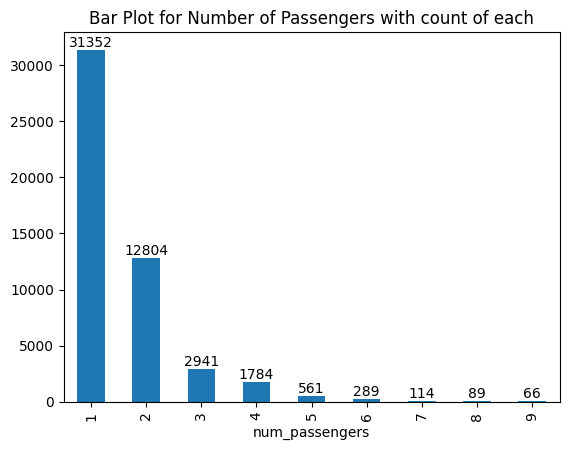

In [40]:
# count of Passengers in each
ax= df['num_passengers'].value_counts().plot(kind="bar", title='Bar Plot for Number of Passengers with count of each')
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()


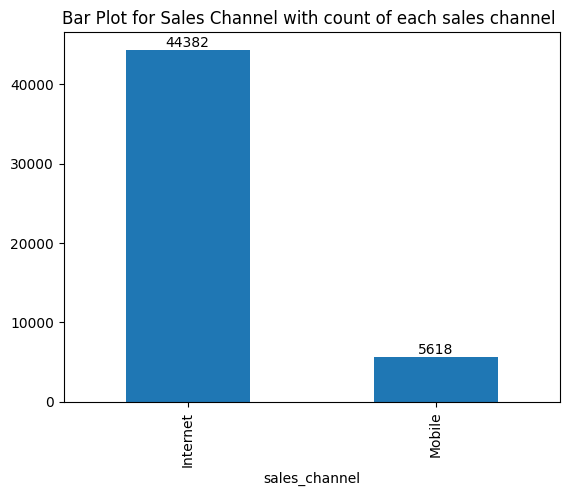

In [41]:
# sales_channel count value and visulaize it
ax = df['sales_channel'].value_counts().plot(kind="bar" ,  title='Bar Plot for Sales Channel with count of each sales channel ')
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

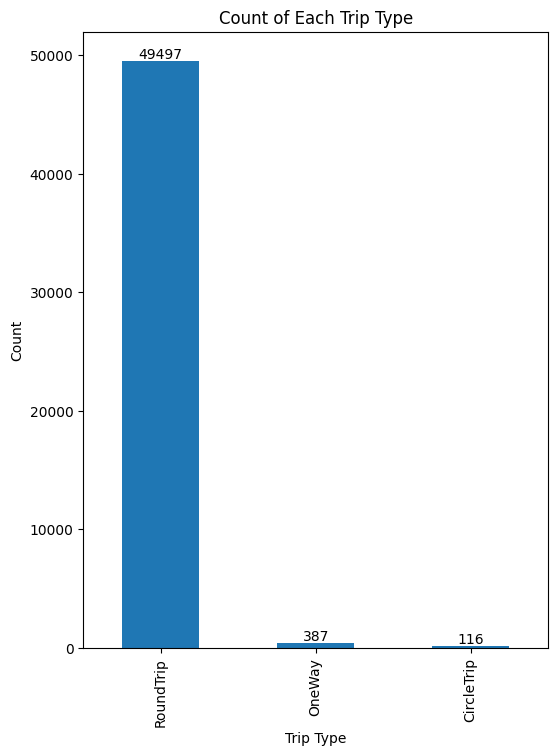

In [42]:
# count trip_type and plot it and display the count each
plt.figure(figsize=(6, 8))
ax = df['trip_type'].value_counts().plot(kind="bar")
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.title('Count of Each Trip Type')

# Add count labels to each bar
ax.bar_label(ax.containers[0])

plt.show()

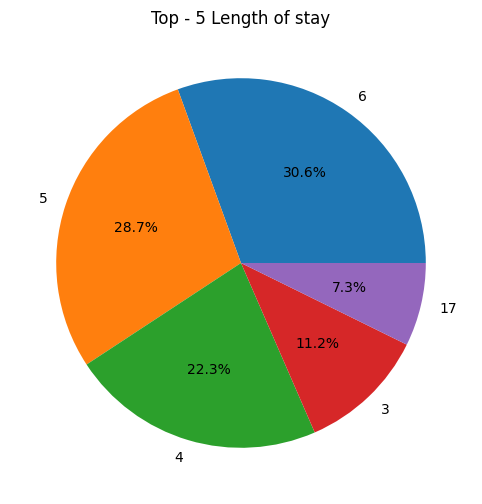

In [43]:
# length_of_stay	Pie Plot for Top - 10 Length of stay while showing the precentage and show count values
df['length_of_stay'].value_counts().sort_values(ascending=False).head().plot(kind="pie" , autopct='%1.1f%%', ylabel="" , figsize=(8, 6) , title='Top - 5 Length of stay')
plt.show()

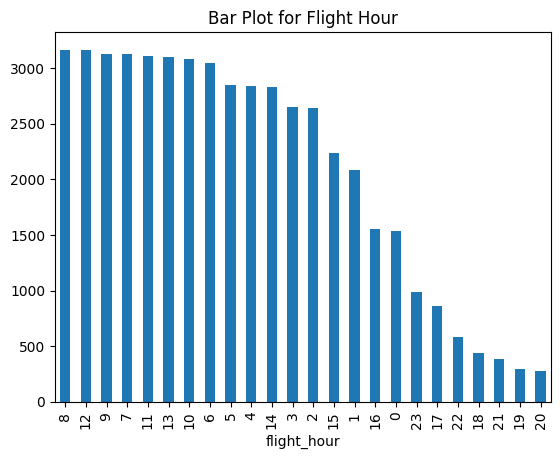

In [44]:
# flight_hour bar Plot for Flight Hour
df['flight_hour'].value_counts().sort_values(ascending=False).plot(kind="bar", title='Bar Plot for Flight Hour')
plt.show()


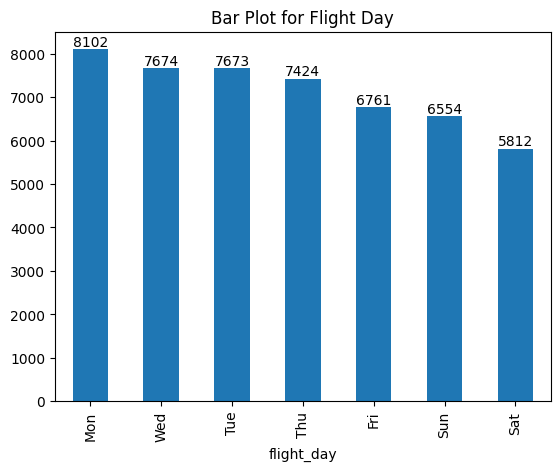

In [45]:
# flight_day plot the count of day people most travle on
ax = df['flight_day'].value_counts().sort_values(ascending=False).plot(kind="bar", title='Bar Plot for Flight Day')
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

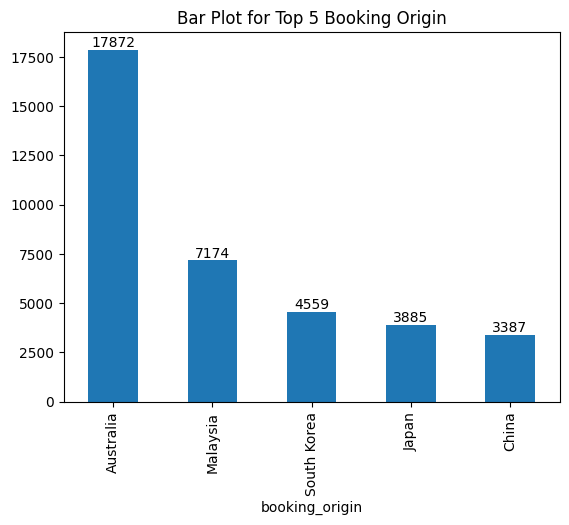

In [50]:
# booking_origin	plot
ax = df['booking_origin'].value_counts().sort_values(ascending=False).head().plot(kind="bar", title='Bar Plot for Top 5 Booking Origin')
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

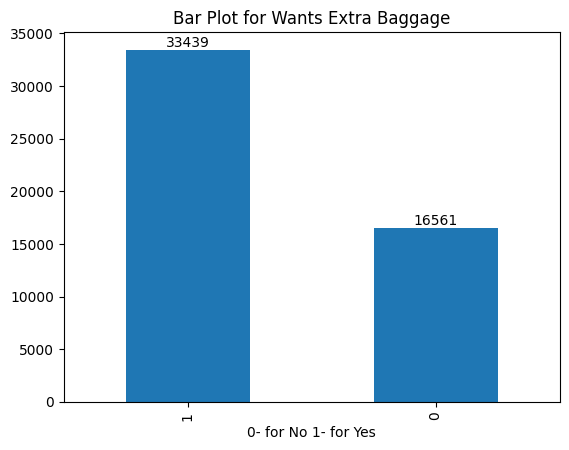

In [51]:
# wants_extra_baggage	plot
ax = df['wants_extra_baggage'].value_counts().plot(kind="bar", title='Bar Plot for Wants Extra Baggage', xlabel="0- for No 1- for Yes")
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

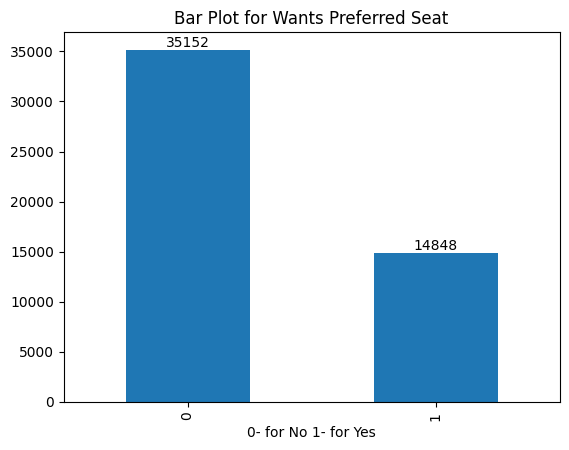

In [52]:
# wants_preferred_seat plot
ax = df['wants_preferred_seat'].value_counts().plot(kind="bar", title='Bar Plot for Wants Preferred Seat', xlabel="0- for No 1- for Yes")
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()


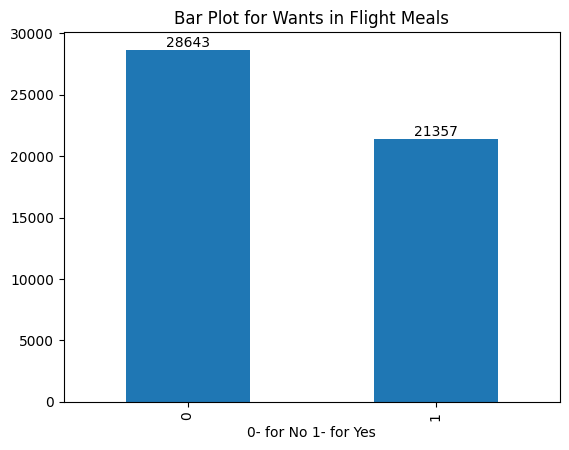

In [53]:
# wants_in_flight_meals plot
ax = df['wants_in_flight_meals'].value_counts().plot(kind="bar", title='Bar Plot for Wants in Flight Meals',  xlabel="0- for No 1- for Yes")
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

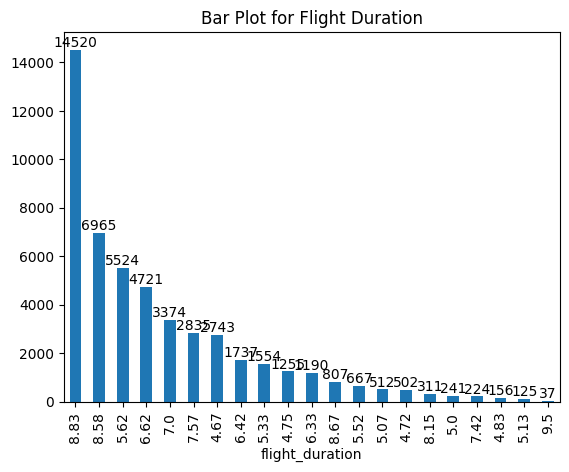

In [54]:
# flight_duration plot
ax = df['flight_duration'].value_counts().sort_values(ascending=False).plot(kind="bar", title='Bar Plot for Flight Duration')
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()

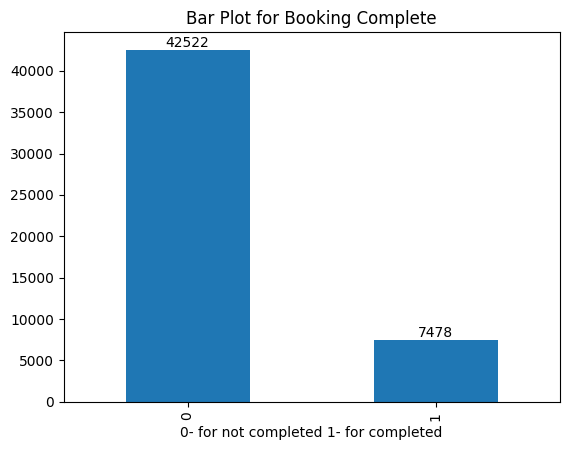

In [55]:
# booking_complete plot
ax = df['booking_complete'].value_counts().plot(kind="bar", title='Bar Plot for Booking Complete', xlabel="0- for not completed 1- for completed")
# Add count labels to each bar
ax.bar_label(ax.containers[0])
plt.show()


## **Prepare the dataset for predictive modelling**

In [58]:
# encode flight day
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

df["flight_day"].unique()


array([6, 3, 4, 1, 7, 2, 5])

In [59]:
# encode trip type
mapping = {
    'OneWay': 1,
    'RoundTrip': 2,
    'CircleTrip': 3
}

df["trip_type"] = df["trip_type"].map(mapping)

df['trip_type'].unique()


array([2, 3, 1])

In [60]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['sales_channel', 'booking_origin', 'origin', 'destination']:
    df[col] = le.fit_transform(df[col])


df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,0,2,262,19,7,6,61,1,0,0,5.52,0,0,4
1,1,0,2,112,20,3,6,61,0,0,0,5.52,0,0,4
2,2,0,2,243,22,17,3,36,1,1,0,5.52,0,0,4
3,1,0,2,96,31,4,6,61,0,0,1,5.52,0,0,4
4,2,0,2,68,22,15,3,36,1,0,1,5.52,0,0,4


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features (X) and target (y)
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
from imblearn.combine import SMOTEENN

# Apply a combination of SMOTE (oversampling) and ENN (undersampling) to the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

## **Train machine learning model and evaluate it**

**Random Forest Model**

In [93]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42 )

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.81
Confusion Matrix:
[[11338  1446]
 [ 1448   768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12784
           1       0.35      0.35      0.35      2216

    accuracy                           0.81     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.81      0.81      0.81     15000



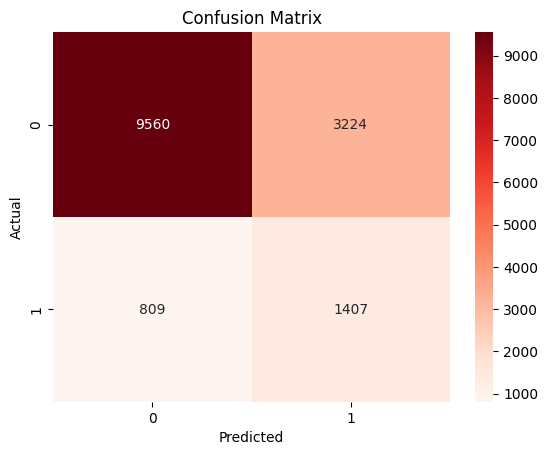

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# check feature importance, which features are most influential
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
7,booking_origin,0.255276
11,flight_duration,0.118783
3,purchase_lead,0.108071
12,origin,0.105180
13,destination,0.096294
4,length_of_stay,0.095223
5,flight_hour,0.069759
6,flight_day,0.053952
1,sales_channel,0.026943
0,num_passengers,0.023483


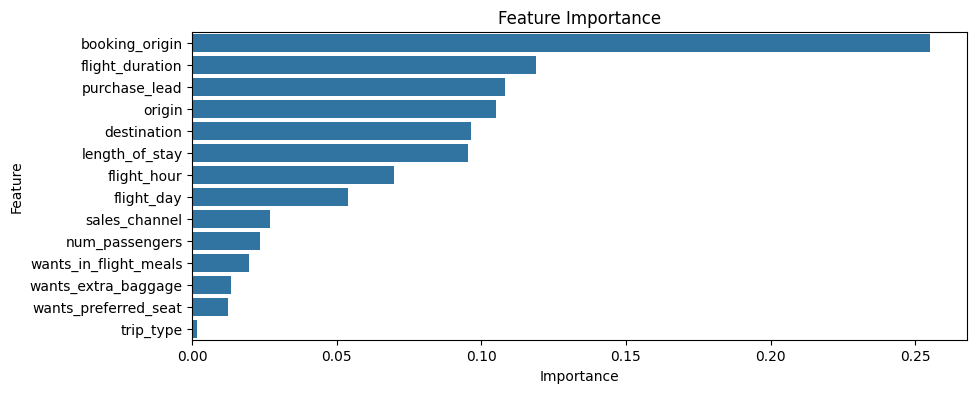

In [84]:
import seaborn as sns

#feature importance plot
plt.figure(figsize=(10,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

**XGBoost Model**

In [88]:
#XGBoost Model
import xgboost as xgb

# Initialize the XGBoost classifier
model2 = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model with the resampled data
model2.fit(X_train_resampled,y_train_resampled)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.7883333333333333
Confusion Matrix:
[[10856  1928]
 [ 1247   969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     12784
           1       0.33      0.44      0.38      2216

    accuracy                           0.79     15000
   macro avg       0.62      0.64      0.63     15000
weighted avg       0.81      0.79      0.80     15000



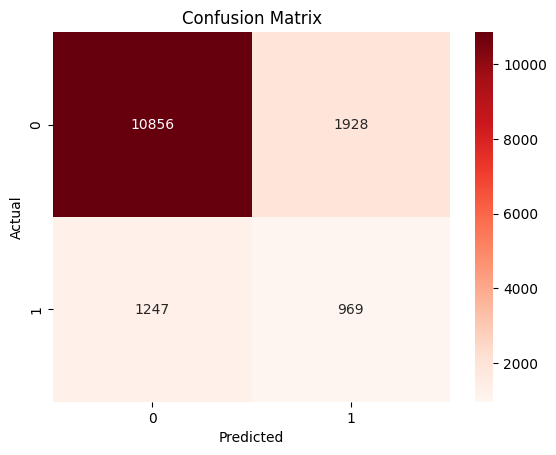

In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

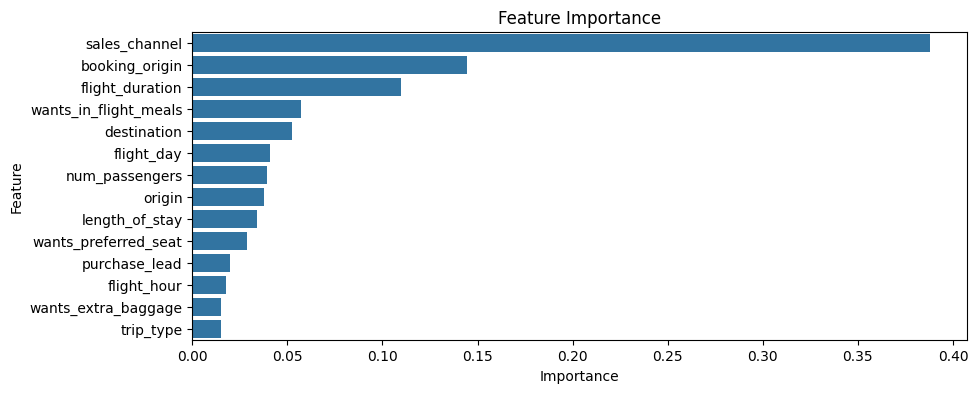

In [91]:
# check feature importance, which features are most influential
importances = model2.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

feature_importance
#feature importance plot
plt.figure(figsize=(10,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()